<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/1_pytorch_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytorch 기초 - #1

In [1]:
import torch
import numpy as np

#간단한 텐서 만들기
data = [[1,2],[3,4]]

#데이터 배열을 텐서로 변환
test_data = torch.tensor(data)

#데이터 배열을 넘파이로 변환
np_array = np.array(data)

#넘파이 배열을 토치로 변환
np_torch = torch.from_numpy(np_array)

#각 변수를 프린트하여 확인
print('<data to tensor> \n' ,test_data)
print('<data to numpy> \n', np_array)
print('<numpy to torch> \n', np_torch)     

test_rand_data = torch.randn(2,2)
print('<random torch 2x2 value> \n', test_rand_data)

<data to tensor> 
 tensor([[1, 2],
        [3, 4]])
<data to numpy> 
 [[1 2]
 [3 4]]
<numpy to torch> 
 tensor([[1, 2],
        [3, 4]])
<random torch 2x2 value> 
 tensor([[-0.4381,  1.2103],
        [-0.2813, -0.1846]])


# pytorch 기초 - #2


In [2]:
import torch
import numpy as np

#텐서 조작하기 
#view함수
t = np.array([[[0,1,2],
              [3,4,5]],
             [[6,7,8],
              [9,10,11]]])

tensor = torch.FloatTensor(t)

#view 함수를 통해 차원을 원하는 형태로 변경
print(tensor.view([-1,3]))
print(tensor.view([-1,3]).shape)

print(tensor.view([-1,1,3]))
print(tensor.view([-1,1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])
tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [3]:
#squeeze/unsqueeze
t = torch.randn(32,32)

#각 함수는 차원을 늘리거나 줄이는데 사용됌
tensor_sq = t.unsqueeze(0)
tensor_usq = tensor_sq.squeeze(0)

print(t.shape)
print(tensor_sq.shape)
print(tensor_usq.shape)

torch.Size([32, 32])
torch.Size([1, 32, 32])
torch.Size([32, 32])


# pytorch 기초 - #3

In [4]:
import torch
import numpy as np

#텐서 연산
#랜덤 값을 가지는 4D텐서 3가지 변수 생성
tensor1 = torch.randn(1,3,32,32)
tensor2 = torch.randn(1,3,32,32)
tensor3 = torch.randn(1,3,32,32)

#텐서 합치기
t1 = torch.cat([tensor1,tensor2,tensor3], dim = 1)
print(t1.shape)

torch.Size([1, 9, 32, 32])


In [5]:
#행렬 곱(matrix multiplication)
#3X3 행렬을 만들기 위한 데이터 배열 생성
d1 = [[1,3,5],[2,4,6],[3,6,9]]
d2 = [[1,2,3],[4,5,6],[7,8,9]]

data1 = torch.tensor(d1)
data2 = torch.tensor(d2)

#행렬곱을 수행하는 연산
mat_data = data1 @ data2.T
mat_data2 = data1.matmul(data2.T)

print('<mat_data> \n', mat_data)
print('<mat_data2> \n', mat_data2)

<mat_data> 
 tensor([[ 22,  49,  76],
        [ 28,  64, 100],
        [ 42,  96, 150]])
<mat_data2> 
 tensor([[ 22,  49,  76],
        [ 28,  64, 100],
        [ 42,  96, 150]])


# MNIST 데이터셋 - #4

In [6]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

batch_size = 100

#torchvision 패키지에 저장되어 있는 MNIST 데이터 셋을 불러옴
train_data = datasets.MNIST(root = './data',
                            train=True, #학습 데이터로 사용할 껴
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data',
                            train=False, #바로 test데이터
                            download=True,
                            transform=transforms.ToTensor())

#DataLoader 함수로 전체 데이터를 배치사이즈 만큼 묶어줌
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size = batch_size, shuffle = True)

#60000개의 데이터셋이 100개단위의 묶음으로 되어 있음
print(len(train_loader))
print(len(test_loader))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

600
100


#MNIST 데이터셋 이미지 출력 - #5

torch.Size([1, 28, 28])
5
<class 'torch.Tensor'>


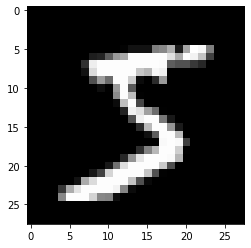

In [7]:
#이미지 예시 출력
import torch
from matplotlib import pyplot as plt

#데이터 세트의 첫번째 인덱스 할당
image ,label = train_data[0]

print(image.shape)
print(label)
print(type(image)) #흑백은 채널을 날려버리거나 squeeze로 아님 채널을 맨 뒤로

plt.imshow(image.squeeze(0).numpy(), cmap = 'gray')

#Cifar 10 데이터셋 - #6


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

#데이터 변형 옵션을 위해 미리 설정값을 셋업해둠
transform_train = transforms.Compose([
    
    # 데이터 어그맨테이션역할을 수행하는 RandoeCrop, RnadomHorizontalFilp함수 추가
    #transforms.RandomCrop(32, padding=4),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#torchvision 패키지로부터 미리 설정해둔 값으로 변경해서 받아옴
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True)


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#Cifar 10 데이터셋 이미지 출력(한장) - #7

9
torch.Size([3, 32, 32])
(32, 32, 3)


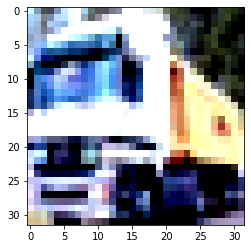

In [9]:
#이미지 예시 출력
import torch
from matplotlib import pyplot as plt
import numpy as np
#데이터 세트의 첫번째 인덱스 할당
image ,label = trainset[1]

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    
    print(label)
    print(image.shape)
    print(np.transpose(npimg,(1,2,0)).shape) #rgb 채널 맨 뒤로 보내기 3,32,32->32,32,3

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

imshow(image)

#Cifar 10 데이터셋 이미지 출력(배치만큼) - #8

In [12]:
from matplotlib import pyplot as plt
import torchvision.utils
import numpy as np

#데이터를 확인해보기위해 iter 함수로 첫번째 데이터 루프를 할당
loader = iter(trainloader)
images, labels = next(loader)

print(images.shape)
print(labels.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])


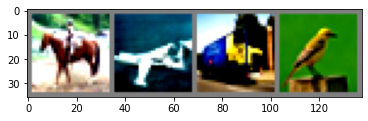

In [13]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#torchvision이 제공하는 이미지 출력 함수. 
imshow(torchvision.utils.make_grid(images))

In [15]:
from matplotlib import pyplot as plt
import torchvision.utils
import numpy as np

#데이터를 확인해보기위해 iter 함수로 첫번째 데이터 루프를 할당
loader = iter(trainloader)
images, labels = next(loader)

print(images.shape)
print(labels.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4])


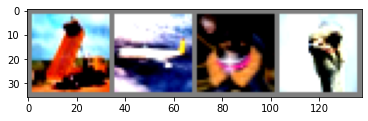

In [16]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#torchvision이 제공하는 이미지 출력 함수. 
imshow(torchvision.utils.make_grid(images))

#Cifar 10 데이터셋 이미지 출력(반복문 사용) - #9

1
torch.Size([3, 32, 32])
tensor(6)
2
torch.Size([3, 32, 32])
tensor(4)
3
torch.Size([3, 32, 32])
tensor(0)
4
torch.Size([3, 32, 32])
tensor(3)


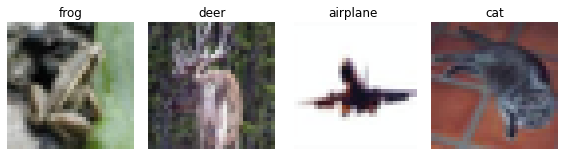

In [17]:
from torchvision.transforms import ToPILImage, Normalize

loader = iter(trainloader)
images, labels = next(loader)

#데이터 받아올때 했던 정규화 작업을 역정규화 작업이 필요함. 
#0.4914, 0.4822, 0.4465 0.2023, 0.1994, 0.2010)  
denormalize = Normalize(
    mean=[-0.4914/0.2023, -0.4822/0.1994, -0.4465/0.2010],
    std=[1/0.2023, 1/0.1994, 1/0.2010]
)

#이미지를 크게 보기 위해서, figure를 크게 만들어줌
plt.figure(figsize=(8,8))
for n, (image, label) in enumerate(zip(images, labels), start=1):

    #배치사이즈 내 인덱싱
    print(n)
    #이미지 사이즈
    print(image.shape)
    #이미지에 대칭하는 레이블 넘버
    print(label)

    plt.subplot(4,4,n)
    plt.imshow(ToPILImage()(denormalize(image)))
    plt.title(f"{trainset.classes[label]}")
    plt.axis('off')


plt.tight_layout()
plt.show()